In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from datetime import datetime, timedelta, date

from pycoingecko import CoinGeckoAPI

#IndexCoop: takeeacy#5560

In [2]:
cg = CoinGeckoAPI()

Index first price day according to Coingecko API 10/6/2020

# Setup Dates

#### Note that my timezone is in Eastern Standard Time (USA) and the data reported in unixtime was later adjusted to my locale. 

In [3]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [4]:
start_dt = date(2020, 10, 6)
end_dt = date(2021, 8, 9)

In [5]:
indexDates = [] 
for dt in daterange(start_dt, end_dt):
    newDt = datetime.strftime(dt, '%d-%m-%Y')
    indexDates.append(newDt)

# Get Coingecko prices from dates described above

In [182]:
indexHistory = cg.get_coin_market_chart_by_id(id='index-cooperative', vs_currency='usd', days='max', interval='daily')

In [25]:
indexEthHistory = cg.get_coin_market_chart_by_id(id='index-cooperative', vs_currency='eth', days='max', interval='daily')

In [16]:
ethHistory = cg.get_coin_market_chart_by_id(id='ethereum', vs_currency='usd', days='max', interval='daily')

In [19]:
indexHistory.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

# Build dataframes

In [67]:
for iteration, key in enumerate(ethHistory.keys()):
    if iteration > 0:
        joiningDf = pd.merge(joiningDf, pd.DataFrame(ethHistory[key], columns = ['unixTime', key]), on='unixTime')
    elif iteration == 0:
        joiningDf = pd.DataFrame(ethHistory[key], columns=['unixTime', key])

In [70]:
mainDf = joiningDf.copy()

In [71]:
for dic in [indexHistory, indexEthHistory]:
    for iteration, key in enumerate(dic.keys()):
        if iteration > 0:
            joiningDf = pd.merge(joiningDf, pd.DataFrame(dic[key], columns = ['unixTime', key]), on='unixTime')
        elif iteration == 0:
            joiningDf = pd.DataFrame(dic[key], columns=['unixTime', key])
    mainDf = pd.merge(mainDf, joiningDf, on='unixTime')

In [76]:
mainDf.columns = ['unixTime', 'ethPrice', 'ethMarketCap', 'ethTotalVolume', 'indexPrice', 'indexMarketCap', 'indexTotalVolume', 'indexPriceInETH', 'indexMarketCapInETH', 'indexTotalVolumeInETH']

In [77]:
mainDf

,unixTime,ethPrice,ethMarketCap,ethTotalVolume,indexPrice,indexMarketCap,indexTotalVolume,indexPriceInETH,indexMarketCapInETH,indexTotalVolumeInETH
0,1602028800000,340.616022,3.841983e+10,1.028098e+10,3.550138,0.000000e+00,27002.899771,0.010397,0.000000,79.082158
1,1602115200000,341.443796,3.855638e+10,8.044228e+09,3.550138,0.000000e+00,27002.899771,0.010397,0.000000,79.082158
2,1602201600000,350.055677,3.953990e+10,9.330979e+09,5.603986,2.542289e+05,55115.572943,0.015970,726.092077,157.068435
3,1602288000000,365.339445,4.126169e+10,1.130170e+10,3.922927,2.112074e+05,59669.160850,0.010739,577.961431,163.336624
4,1602374400000,370.471811,4.191945e+10,1.067399e+10,2.976718,1.864196e+05,26187.182401,0.008030,502.483551,70.645259
...,...,...,...,...,...,...,...,...,...,...
301,1628035200000,2521.268475,2.947600e+11,2.630438e+10,27.607461,5.323460e+07,97357.032722,0.010989,21185.581046,38.751073
302,1628121600000,2724.532243,3.196132e+11,2.935665e+10,29.785522,5.852993e+07,527461.248882,0.010930,21401.091740,193.552441
303,1628208000000,2821.649693,3.302237e+11,3.797035e+10,33.152272,6.619275e+07,236040.514370,0.011741,23433.921535,83.592621
304,1628294400000,2888.732274,3.379615e+11,3.087644e+10,35.287919,7.037385e+07,528469.873543,0.012217,24350.890217,182.954357


# Change Unix times

In [163]:
newTime = []
for unixTime in mainDf.unixTime:
    dt = datetime.fromtimestamp(unixTime/1000)
    newTime.append([
        unixTime,
        str(dt)[:10],
        dt.year,
        dt.month,
        dt.day,
        dt.weekday(),
    ])

In [164]:
newTimeDf = pd.DataFrame(newTime, columns = ['unixTime', 'date', 'year', 'month', 'day', 'weekday'])

In [165]:
def weekdayConverter(x):
    if x == 0:
        return('Mon')
    elif x == 1:
        return('Tue')
    elif x == 2:
        return('Wed')
    elif x == 3:
        return('Thu')
    elif x == 4:
        return('Fri')
    elif x == 5:
        return('Sat')
    elif x == 6:
        return('Sun')

In [166]:
newTimeDf['weekday_str'] = newTimeDf['weekday'].apply(weekdayConverter)

In [169]:
newTimeDf

,unixTime,date,year,month,day,weekday,weekday_str
0,1602028800000,2020-10-06,2020,10,6,1,Tue
1,1602115200000,2020-10-07,2020,10,7,2,Wed
2,1602201600000,2020-10-08,2020,10,8,3,Thu
3,1602288000000,2020-10-09,2020,10,9,4,Fri
4,1602374400000,2020-10-10,2020,10,10,5,Sat
...,...,...,...,...,...,...,...
301,1628035200000,2021-08-03,2021,8,3,1,Tue
302,1628121600000,2021-08-04,2021,8,4,2,Wed
303,1628208000000,2021-08-05,2021,8,5,3,Thu
304,1628294400000,2021-08-06,2021,8,6,4,Fri


In [168]:
mainDf = pd.merge(newTimeDf, mainDf, on='unixTime')

# Visualize

<AxesSubplot:ylabel='indexPrice'>

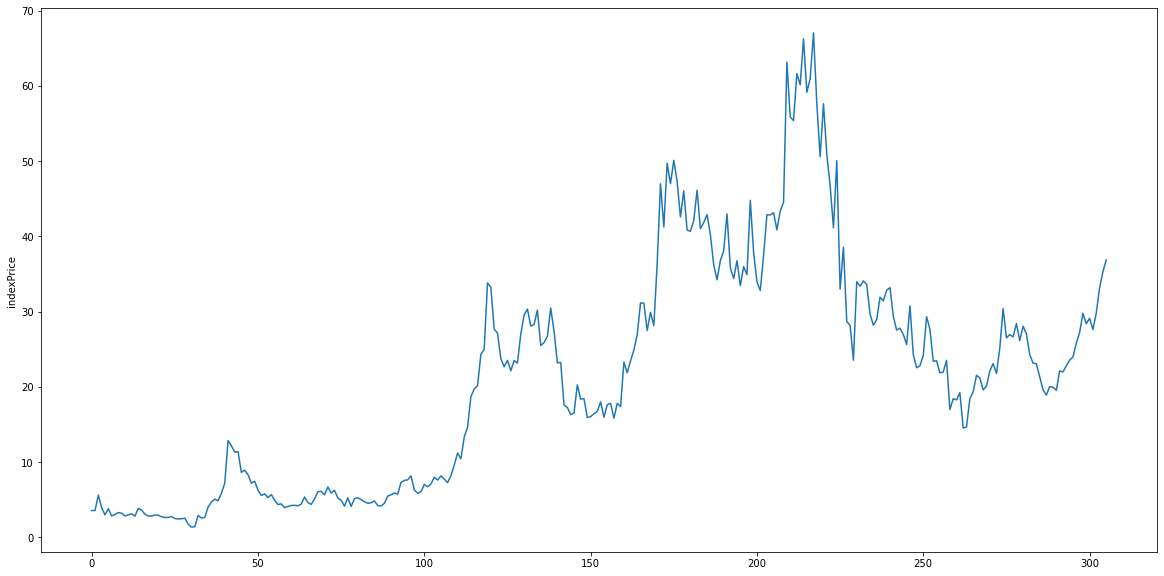

In [189]:
plt.figure(figsize=(20,10))
sns.lineplot(x=mainDf.index, y=mainDf.indexPrice)

<AxesSubplot:ylabel='ethPrice'>

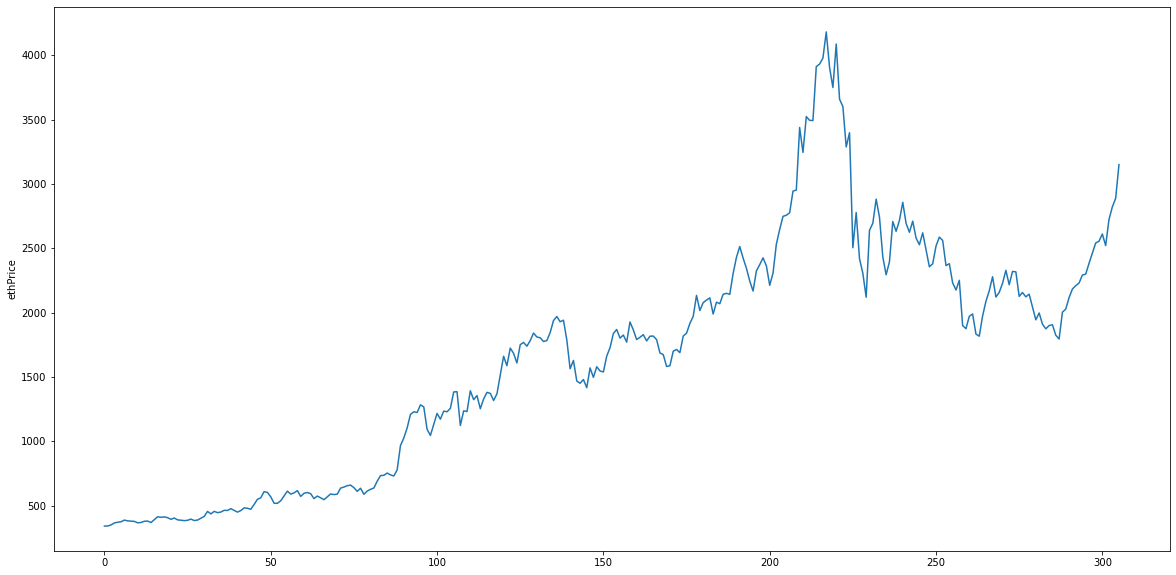

In [190]:
plt.figure(figsize=(20,10))
sns.lineplot(x=mainDf.index, y=mainDf.ethPrice)

# Price comparison since genesis

In [139]:
mainDf['indexPrice'].describe()

count    306.000000
mean      21.193961
std       15.270294
min        1.350407
25%        5.851592
50%       21.649440
75%       30.120881
max       67.031503
Name: indexPrice, dtype: float64

In [140]:
pg.compute_bootci(x=mainDf.indexPrice, func='std', n_boot=10000, seed=0)

array([14.15, 16.44])

In [185]:
mainDf['indexPriceInETH'].describe()

count    306.000000
mean       0.011853
std        0.004698
min        0.003070
25%        0.008408
50%        0.010977
75%        0.014682
max        0.029444
Name: indexPriceInETH, dtype: float64

In [186]:
pg.compute_bootci(x=mainDf.indexPriceInETH, func='std', n_boot=10000, seed=0)

array([0.  , 0.01])

#### Since genesis, standard deviation of INDEX price has been $15.27 with 95% confidence interval (14.15,16.44). Measured in ETH, standard deviation of INDEX price has been 0.004698 ETH 95%CI (0, 0.01). I suspect there is a lower bound to reporting the bottom end of the 95% CI range. 

#### Check if prices are multivariate normal and appropriate for Pearson's correlation

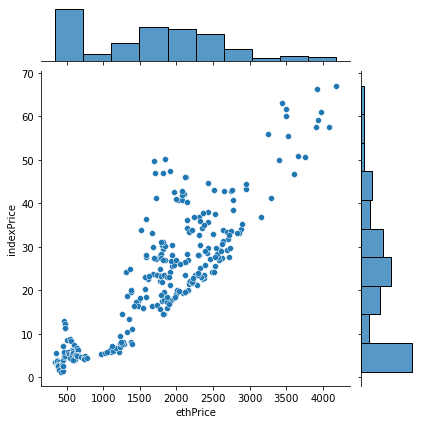

In [130]:
sns.jointplot(x=mainDf.ethPrice, y=mainDf.indexPrice)

In [128]:
pg.multivariate_normality(mainDf[['ethPrice','indexPrice']])

HZResults(hz=12.844396867304111, pval=1.5469998534002195e-22, normal=False)

#### Index and ETH prices are not multivariate normal. Thus, analyses will use spearman's correlation instead

In [132]:
pg.corr(mainDf.ethPrice, mainDf.indexPrice, method='spearman')

,n,r,CI95%,p-val,power
spearman,306,0.878025,"[0.85, 0.9]",2.704555e-99,1.0


# 90d comparison 

In [141]:
df90d['indexPrice'].describe()

count    90.000000
mean     28.442602
std      10.067106
min      14.519869
25%      22.100861
50%      26.786416
75%      30.660106
max      67.031503
Name: indexPrice, dtype: float64

In [142]:
pg.compute_bootci(x=df90d.indexPrice, func='std', n_boot=10000, seed=0)

array([ 7.66, 12.51])

In [187]:
df90d['indexPriceInETH'].describe()

count    90.000000
mean      0.011291
std       0.001658
min       0.007905
25%       0.009910
50%       0.011084
75%       0.012335
max       0.016011
Name: indexPriceInETH, dtype: float64

In [188]:
pg.compute_bootci(x=df90d.indexPriceInETH, func='std', n_boot=10000, seed=0)

array([0., 0.])

#### In the last 90 days, standard deviation of INDEX price has been $10.06 with 95% confidence interval (7.66,12.51). Measured in ETH, standard deviation of INDEX price has been 0.001658 ETH 95%CI (0, 0). I suspect there is a lower bound to reporting the bottom end of the 95% CI range. 

In [134]:
df90d = mainDf.iloc[-90:, :]

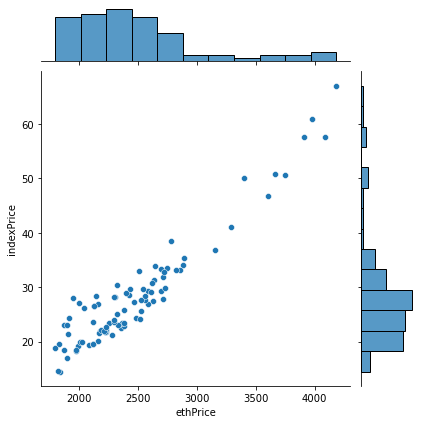

In [135]:
sns.jointplot(x=df90d.ethPrice, y=df90d.indexPrice)

In [136]:
pg.multivariate_normality(df90d[['ethPrice','indexPrice']])

HZResults(hz=4.024511011843109, pval=4.649105089437152e-09, normal=False)

#### Index and ETH prices are not multivariate normal. Thus, analyses will use spearman's correlation instead

In [138]:
pg.corr(df90d.ethPrice, df90d.indexPrice, method='spearman')

,n,r,CI95%,p-val,power
spearman,90,0.871589,"[0.81, 0.91]",5.525696e-29,1.0


# Rolling sum trading vol

## 7 day

In [151]:
mainDf['rolling7dayTotalVolume'] = mainDf['indexTotalVolume'].rolling(7).sum()

In [174]:
mainDf[['date', 'rolling7dayTotalVolume']].iloc[-30:,:]

,date,rolling7dayTotalVolume
276,2021-07-09,2.698948e+06
277,2021-07-10,2.539769e+06
278,2021-07-11,2.309264e+06
279,2021-07-12,1.975311e+06
280,2021-07-13,1.746115e+06
281,2021-07-14,1.237540e+06
282,2021-07-15,1.341730e+06
283,2021-07-16,1.333121e+06
284,2021-07-17,1.196854e+06
285,2021-07-18,1.050652e+06


## 30 day

In [175]:
mainDf['rolling30dayTotalVolume'] = mainDf['indexTotalVolume'].rolling(30).sum()

In [176]:
mainDf[['date', 'rolling30dayTotalVolume']].iloc[-30:,:]

,date,rolling30dayTotalVolume
276,2021-07-09,1.225826e+07
277,2021-07-10,1.166529e+07
278,2021-07-11,1.139324e+07
279,2021-07-12,1.099123e+07
280,2021-07-13,1.113834e+07
281,2021-07-14,1.065331e+07
282,2021-07-15,1.026790e+07
283,2021-07-16,9.805584e+06
284,2021-07-17,9.438391e+06
285,2021-07-18,9.069705e+06


# Rolling average trading vol

## 7 day

In [177]:
mainDf['rolling7dayMeanVolume'] = mainDf['indexTotalVolume'].rolling(7).mean()

In [178]:
mainDf[['date', 'rolling7dayMeanVolume']].iloc[-30:,:]

,date,rolling7dayMeanVolume
276,2021-07-09,385564.010081
277,2021-07-10,362824.100422
278,2021-07-11,329894.905019
279,2021-07-12,282187.228170
280,2021-07-13,249444.965204
281,2021-07-14,176791.473145
282,2021-07-15,191675.744376
283,2021-07-16,190445.811128
284,2021-07-17,170979.144331
285,2021-07-18,150093.214022


## 30 day

In [180]:
mainDf['rolling30dayMeanVolume'] = mainDf['indexTotalVolume'].rolling(30).mean()

In [181]:
mainDf[['date', 'rolling30dayMeanVolume']].iloc[-30:,:]

,date,rolling30dayMeanVolume
276,2021-07-09,408608.530101
277,2021-07-10,388843.015330
278,2021-07-11,379774.627058
279,2021-07-12,366374.322323
280,2021-07-13,371277.965951
281,2021-07-14,355110.215699
282,2021-07-15,342263.332681
283,2021-07-16,326852.797506
284,2021-07-17,314613.035807
285,2021-07-18,302323.514908


In [183]:
mainDf.to_csv('indexKPI.csv',index=False)